In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load simulated data
df = pd.read_csv("../data/ab_simulated_flights.csv")

# Quick peek
df.head()


,user_id,group,flight_route,device_type,time_on_page,booked
0,0,control,CDG-SIN,mobile,67.290501,0
1,1,treatment,CDG-SIN,mobile,58.378781,0
2,2,control,CDG-SIN,mobile,46.000042,0
3,3,control,LHR-DXB,mobile,67.435068,0
4,4,control,CDG-SIN,mobile,44.820174,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       10000 non-null  int64  
 1   group         10000 non-null  object 
 2   flight_route  10000 non-null  object 
 3   device_type   10000 non-null  object 
 4   time_on_page  10000 non-null  float64
 5   booked        10000 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


In [4]:
df.group.value_counts()

group
control      5013
treatment    4987
Name: count, dtype: int64

In [5]:
df.describe()


,user_id,time_on_page,booked
count,10000.00000,10000.000000,10000.000000
mean,4999.50000,45.071381,0.076300
std,2886.89568,14.820245,0.265491
min,0.00000,5.000000,0.000000
25%,2499.75000,34.930527,0.000000
50%,4999.50000,45.151095,0.000000
75%,7499.25000,55.262082,0.000000
max,9999.00000,107.218426,1.000000


In [15]:
# 3. See overall summary
summary = df.groupby("group")["booked"].agg(['mean', 'count', 'sum'])
print(summary)


               mean  count  sum
group                          
control    0.063435   5013  318
treatment  0.089232   4987  445


In [16]:
summary['mean']


group
control      0.063435
treatment    0.089232
Name: mean, dtype: float64

In [17]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from statsmodels.stats.proportion import proportions_ztest

# Count of bookings
bookings = df.groupby("group")["booked"].sum().values
# Number of users
n_obs = df.groupby("group")["booked"].count().values

stat, pval = proportions_ztest(bookings, n_obs)
print(f"Z-test statistic: {stat:.4f}, p-value: {pval:.4f}")


Z-test statistic: -4.8586, p-value: 0.0000


In [22]:
df.groupby("group")["booked"].sum().values

array([318, 445])

In [19]:
from scipy.stats import ttest_ind

control = df[df["group"] == "control"]["booked"]
treatment = df[df["group"] == "treatment"]["booked"]

t_stat, p_val = ttest_ind(treatment, control)
print(f"t-test statistic: {t_stat:.4f}, p-value: {p_val:.4f}")


t-test statistic: 4.8638, p-value: 0.0000


C:\Users\hirat\AppData\Local\Temp\ipykernel_11180\1421763276.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="group", y="booked", ci=95)


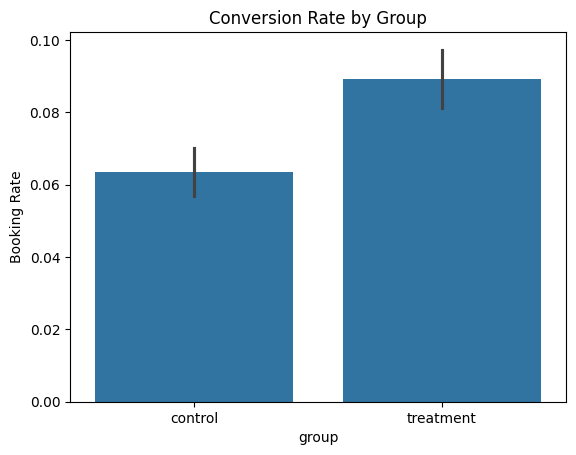

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: prepare a smaller summary DataFrame
summary_df = df.groupby("group")["booked"].agg(['mean', 'count', 'sum']).reset_index()

sns.barplot(data=df, x="group", y="booked", ci=95)
plt.title("Conversion Rate by Group")
plt.ylabel("Booking Rate")
plt.show()


In [22]:
df

,user_id,group,flight_route,device_type,time_on_page,booked
0,0,control,CDG-SIN,mobile,67.290501,0
1,1,treatment,CDG-SIN,mobile,58.378781,0
2,2,control,CDG-SIN,mobile,46.000042,0
3,3,control,LHR-DXB,mobile,67.435068,0
4,4,control,CDG-SIN,mobile,44.820174,0
...,...,...,...,...,...,...
9995,9995,treatment,CDG-SIN,mobile,44.625958,0
9996,9996,control,CDG-SIN,mobile,77.865389,0
9997,9997,treatment,AMS-JFK,desktop,66.978445,0
9998,9998,treatment,LHR-DXB,desktop,70.163487,1


In [19]:
summary_df['conversion_rate'] = summary_df['sum']/summary_df['count']

In [20]:
summary_df


,group,mean,count,sum,conversion_rate
0,control,0.063435,5013,318,0.063435
1,treatment,0.089232,4987,445,0.089232


In [21]:
rate_diff = summary_df['conversion_rate'][1] - summary_df['conversion_rate'][0]
print(f"Difference in conversion rate: {rate_diff:.4%}")


Difference in conversion rate: 2.5797%
